## Table of Contents:
1. [Problem Statement, Insights and Recommendations](#toc1)


2. [Non Graphical EDA](#toc2)
    - [Numercial Columns Distribution](#toc2.1) 
    - [Categorical Columns Distribution](#toc2.2) 
    
    
3. [Graphical EDA](#toc3)
    - [Show Release Year & Show Added on Netflix Year Analysis](#toc4)
        - [Trend of Movies/TV Shows released](#toc4.1)
        - [Trend of Movies/TV Shows added on Netflix](#toc4.2)
        - [Release Date vs Added date](#toc4.3)
    - [Director/Cast/Genre Analysis](#toc5)
        - [Top director/cast/genres](#toc5.1)
            - [Top 15 directors/casts in movies](#toc5.1.1)
            - [Top 15 directors/cast in TV Shows](#toc5.1.2)
            - [Top 10 genres for movies/TV shows](#toc5.1.3)
        - [Countries leading in content genre-wise](#toc5.2)
        - [Recommendation for best upcoming country for each genre](#toc5.3)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

# Problem Statement, Insights and Recommendations: <a class='anchor' id='toc1'></a> 

- Problem Statement : 
    - Analyze the data and generate insights that could help Netflix in deciding **which type of shows/movies to produce** and how they can **grow the business in different countries**

- Insights : 
    - Content creation has exploded post 2015, reaching maximum in 2018 [(graph here)](#toc4.1) 
    - The fraction of TV shows created has been steadily increasing since 2017, surpassing 50% mark in 2021 [(graph here)](#toc4.1) 
    - Content added on netflix has grown exponentially since 2015, reaching maximum in 2019 [(graph here)](#toc4.2) 
    - Content has been added uniformly across all months [(graph here)](#toc4.2)
    - Netflix has a strong preference of adding content on either 1st or 15th of a month [(graph here)](#toc4.2)
    - Best Movie Director : Rajiv Chilaka (Animator for Chota Bheem) [(graph here)](#toc5.1.1)
    - Best Movie Cast : Anupam Kher (Big Bollywood Star) [(graph here)](#toc5.1.1)
    - Best TV Show Director : Alastair Fothergill (Nature Documentaries like Our Planet) [(graph here)](#toc5.1.2) 
    - Best TV Show Cast : Takahiro Sakurai (Japanese Voice actor eg Jujutsu Kaisen) [(graph here)](#toc5.1.2) 
    - Top 3 movie Genres : Dramas, Comedies, Documentaries [(graph here)](#toc5.1.3) 
    - Top 3 TV Show Genres : Dramas, Comedies, Crime [(graph here)](#toc5.1.3) 
    - US is top producer leading in 35 out of 42 Genres  [(graph here)](#toc5.2)
        
- Recommendations : 
    - Netflix should keep on adding content which has been produced in US as it has its strongest holding there
    - In order to expand into more countries, Netflix needs to look beyond its biggest producers ie US. It needs to add content from countries which shows the highest promise for a particular genre, and also needs to hire the best native talent in terms of the director and the cast. Following are some my recommendations based on data : [(supporting data and all recommendations)](#toc5.3)
        - Thrillers : Directed by Anurag Kashyap casting Nawazuddin Siddiqui produced in India
        - Docuseries : Directed by Alastair Fothergill casting David Attenborough produced in UK
        - TV Dramas : Directed by Jeon Go-woon casting Cho Seong-ha produced in South Korea
        - Sports Movies : Directed by Clay Porter casting Usain Bolt produced in UK

# Non Graphical Eda <a class='anchor' id='toc2'></a>

In [2]:
df = pd.read_csv('netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Missing values!** 
- Missing values present in :  director, cast, country,  date_added, rating, duration
- Director data has highest nulls : ~2.5k movies/tv shows data is missing

----

In [5]:
# adding a year column will help with analysis further
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added_year'] = df['date_added'].dt.year

## Numercial Columns Distribution <a class='anchor' id='toc2.1'></a>

In [6]:
df.describe()

,release_year,date_added_year
count,8807.000000,8797.000000
mean,2014.180198,2018.871888
std,8.819312,1.574243
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


## Categorical Columns Distribution <a class='anchor' id='toc2.2'></a>

In [7]:
df.describe(include='O')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


# Graphical Eda <a class='anchor' id='toc3'></a>

## Show Release Year & Show Added on Netflix Year Analysis <a class='anchor' id='toc4'></a>

### Trend of Movies/TV Shows released : <a class='anchor' id='toc4.1'></a>

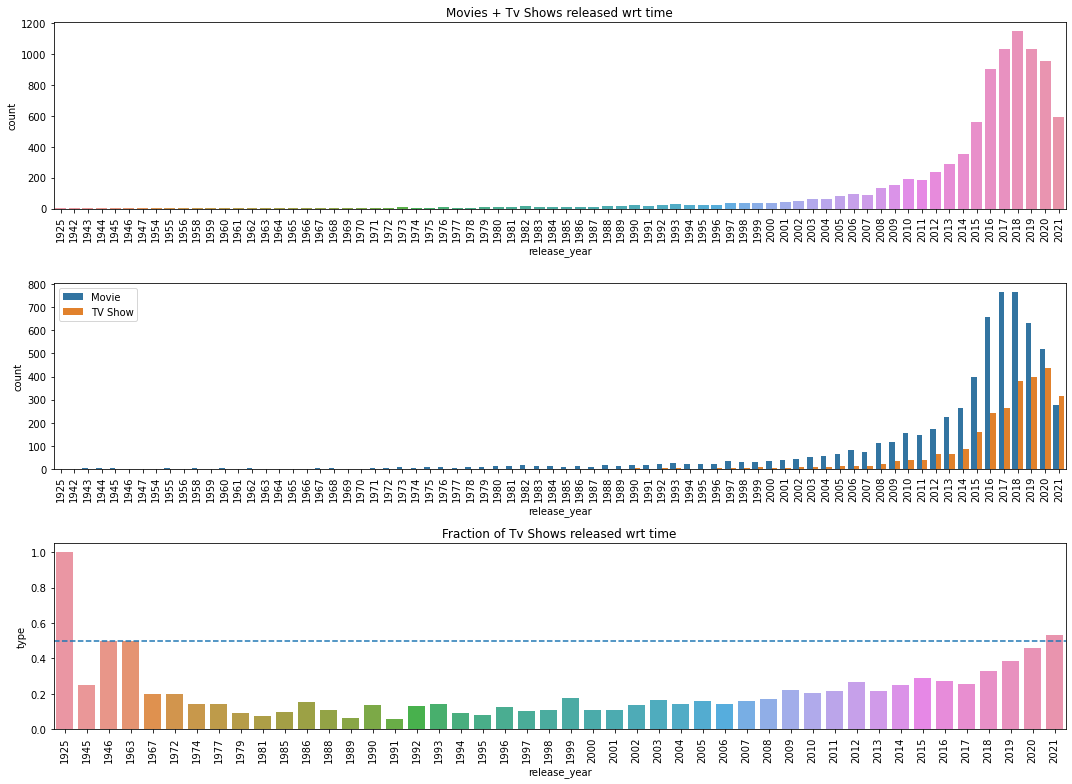

In [8]:
fig, ax = plt.subplots(3,1,figsize=(15,11))
sns.countplot(x='release_year',data=df,ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('Movies + Tv Shows released wrt time')
sns.countplot(x='release_year',hue='type',data=df,ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
ax[1].legend(loc='upper left')
tmp = pd.DataFrame(df.groupby('release_year')['type'].value_counts(1))
tmp = tmp.iloc[tmp.index.get_level_values(1) == 'TV Show'].droplevel(1).reset_index()
sns.barplot(x='release_year',y='type',data=tmp,ax=ax[2])
ax[2].axhline(0.5,ls='--')
ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=90)
ax[2].set_title('Fraction of Tv Shows released wrt time')
fig.tight_layout()
print()

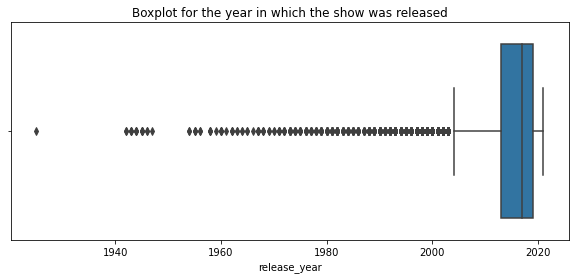

In [9]:
plt.rcParams['figure.figsize'] = 10,4
g = sns.boxplot(df['release_year'])
g.set_title('Boxplot for the year in which the show was released')
print()

Insights : 
- Content creation has exploded post 2015, reaching maximum in 2018
- The fraction of TV shows has been steadily increasing since 2017, surpassing 50% mark in 2021

### Trend of Movies/TV Shows added on Netflix : <a class='anchor' id='toc4.2'></a>

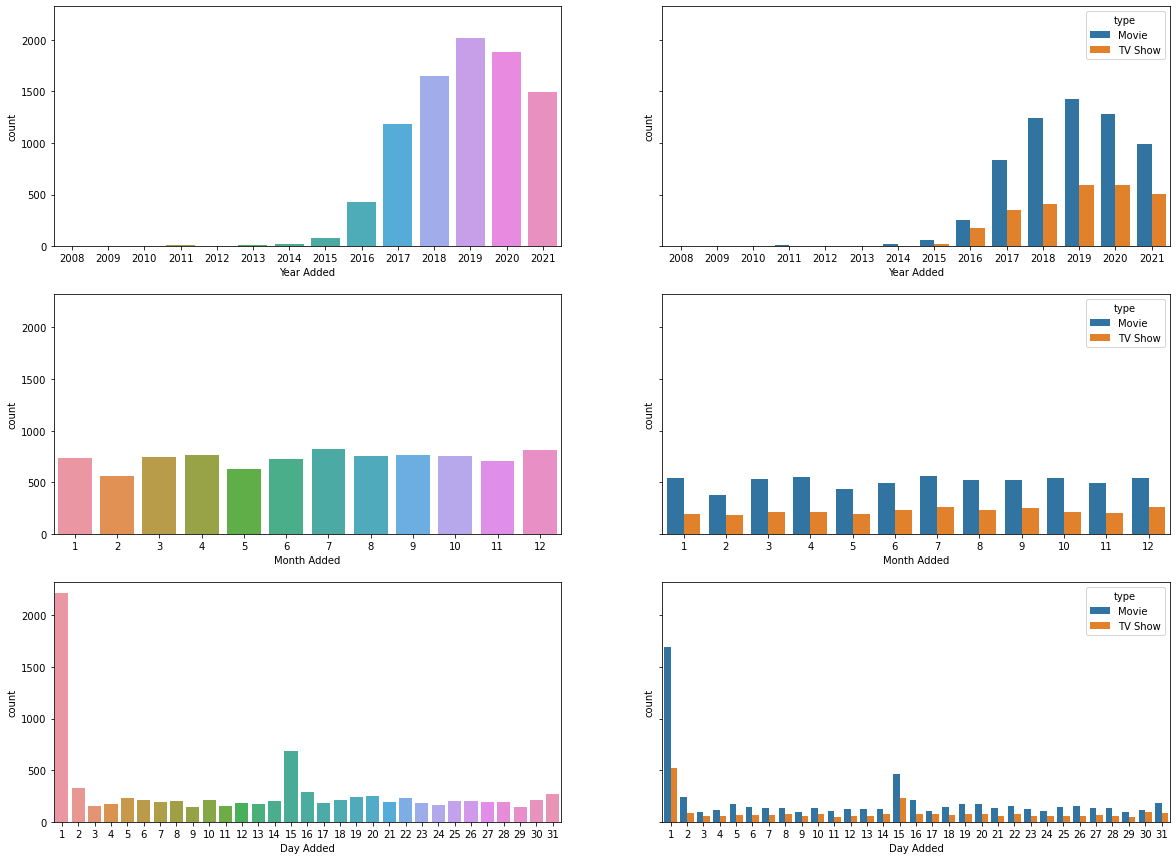

In [10]:
fig,ax = plt.subplots(3,2,figsize=(20,15), sharey=True)
sns.countplot(df['date_added'].dt.year.dropna().astype(int),ax=ax[0][0])
ax[0][0].set_xlabel('Year Added')
sns.countplot(df['date_added'].dt.month.dropna().astype(int),ax=ax[1][0])
ax[1][0].set_xlabel('Month Added')
sns.countplot(df['date_added'].dt.day.dropna().astype(int),ax=ax[2][0])
ax[2][0].set_xlabel('Day Added')

sns.countplot(df['date_added'].dt.year.dropna().astype(int),ax=ax[0][1],hue=df['type'])
ax[0][1].set_xlabel('Year Added')
sns.countplot(df['date_added'].dt.month.dropna().astype(int),ax=ax[1][1],hue=df['type'])
ax[1][1].set_xlabel('Month Added')
sns.countplot(df['date_added'].dt.day.dropna().astype(int),ax=ax[2][1],hue=df['type'])
ax[2][1].set_xlabel('Day Added')
print()

Insights : 
- Content added on netflix has grown exponentially since 2015, reaching maximum in 2019
- Content has been added uniformly across all months
- Netflix has a strong preference of adding content on either 1st or 15th of a month

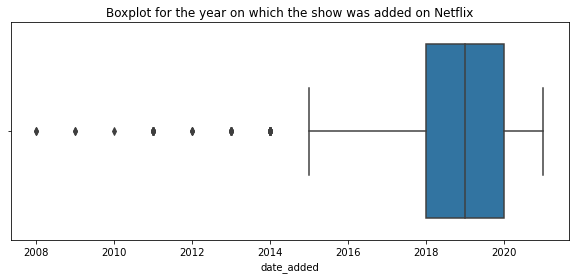

In [11]:
plt.rcParams['figure.figsize'] = 10,4
g = sns.boxplot(df['date_added'].dt.year)
g.set_title('Boxplot for the year on which the show was added on Netflix')
print()

### Release Date vs Added date : <a class='anchor' id='toc4.3'></a>

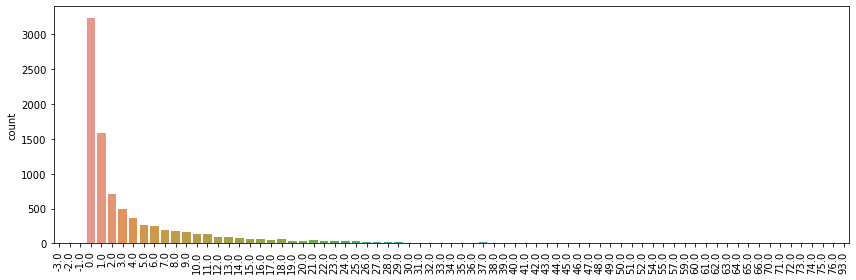

In [12]:
plt.rcParams['figure.figsize'] = 12,4
plt.rcParams['figure.autolayout'] = True
g = sns.countplot((df['date_added'].dt.year - df['release_year']))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
print()

<AxesSubplot:>

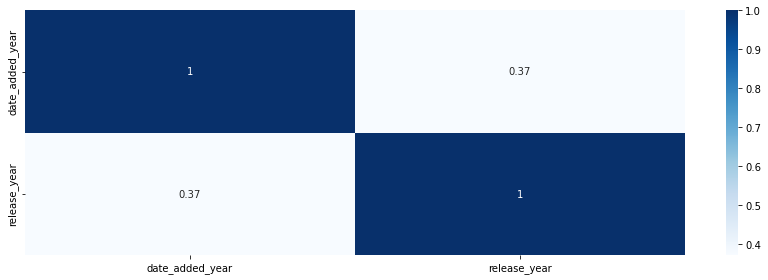

In [13]:
# We dont use Pearson correlation because columns are not normally distributed
sns.heatmap(df[['date_added_year','release_year']].corr(method='spearman'), annot=True, cmap='Blues')

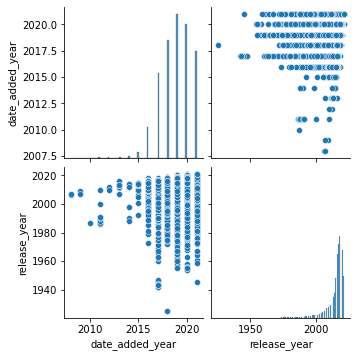

In [14]:
sns.pairplot(df[['date_added_year','release_year']])
print()

Insight : 
- We can see most of the content is added the same year as it was released

----

## Director/Cast/Genre Analysis : <a class='anchor' id='toc5'></a>

### Top director/cast/genres : <a class='anchor' id='toc5.1'></a>

In [15]:
print(f"Mean null values in director column : {round(df['director'].isna().mean() * 100)}%")
print(f"Mean null values in cast column : {round(df['cast'].isna().mean() * 100)}%")
df.groupby('type')[['director','cast']].apply(lambda x : round(x.isna().mean()*100))

Mean null values in director column : 30%
Mean null values in cast column : 9%


,director,cast
type,,
Movie,3.0,8.0
TV Show,91.0,13.0


Insight : 
- TV shows have 91% missing directors data!

----

In [29]:
def flatten_list(og_list):
    """ Flattens the input list.
    input -> ['raunak','abhinav','abhjieet, rupesh, aryan']
    output -> ['raunak','abhinav','abhjieet', 'rupesh', 'aryan']"""
    flattend_list = []
    for i in og_list:
        if isinstance(i,str):
            flattend_list.extend([i.strip() for i in i.split(',')])
    return flattend_list

In [17]:
#movie_dirs contains a list of all the movie directors
movie_dirs = flatten_list(df.loc[df['type'] == 'Movie','director'].tolist())
movie_cast = flatten_list(df.loc[df['type'] == 'Movie','cast'].tolist())

tv_dirs = flatten_list(df.loc[df['type'] == 'TV Show','director'].tolist())
tv_cast = flatten_list(df.loc[df['type'] == 'TV Show','cast'].tolist())

#### Top 15 directors/casts in movies : <a class='anchor' id='toc5.1.1'></a>

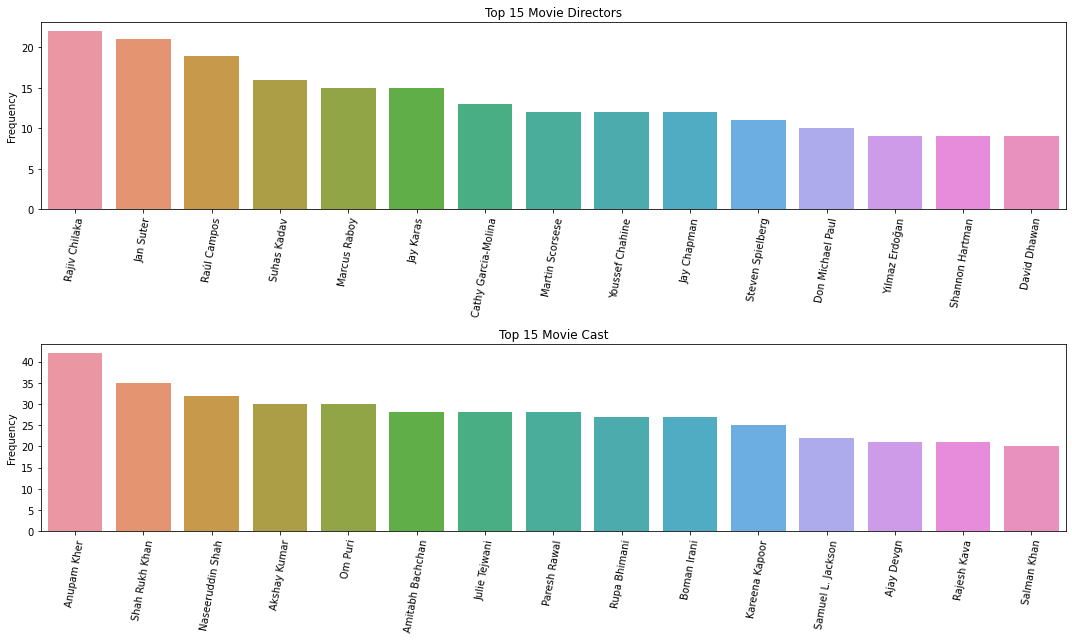

In [18]:
fig, ax = plt.subplots(2,1,figsize=(15,9))
sns.barplot(x=pd.Series(movie_dirs).value_counts().head(15).index, y=pd.Series(movie_dirs).value_counts().head(15).values, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=80)
ax[0].set_title('Top 15 Movie Directors')
ax[0].set_ylabel('Frequency')
sns.barplot(x=pd.Series(movie_cast).value_counts().head(15).index, y=pd.Series(movie_cast).value_counts().head(15).values, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=80)
ax[1].set_title('Top 15 Movie Cast')
ax[1].set_ylabel('Frequency')
fig.tight_layout()
print()

#### Top 15 directors/casts in TV Shows : <a class='anchor' id='toc5.1.2'></a>

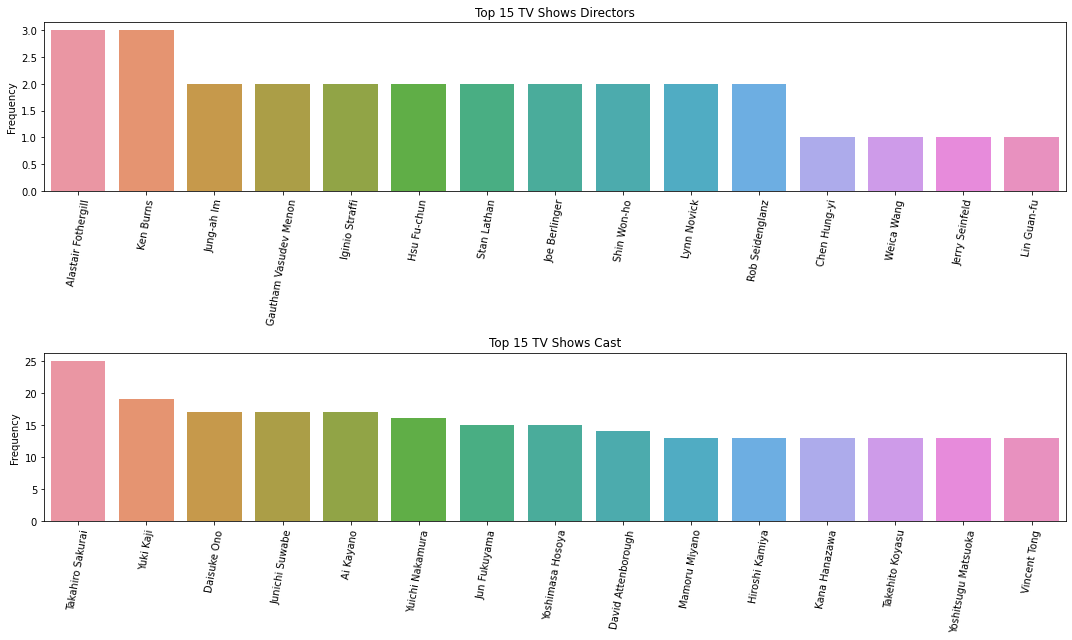

In [19]:
fig, ax = plt.subplots(2,1,figsize=(15,9))
sns.barplot(x=pd.Series(tv_dirs).value_counts().head(15).index, y=pd.Series(tv_dirs).value_counts().head(15).values, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=80)
ax[0].set_title('Top 15 TV Shows Directors')
ax[0].set_ylabel('Frequency')
sns.barplot(x=pd.Series(tv_cast).value_counts().head(15).index, y=pd.Series(tv_cast).value_counts().head(15).values, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=80)
ax[1].set_title('Top 15 TV Shows Cast')
ax[1].set_ylabel('Frequency')
fig.tight_layout()
print()

Insight : 
    - Best Movie Director : Rajiv Chilaka (Animator for Chota Bheem)
    - Best Movie Cast : Anupam Kher (Big Bollywood Star)
    - Best TV Show Director : Alastair Fothergill (Nature Documentaries like Our Planet) 
    - Best TV Show Cast : Takahiro Sakurai (Japanese Voice actor eg Jujutsu Kaisen)        

In [20]:
movie_genres = flatten_list(df.loc[df['type'] == 'Movie','listed_in'].tolist())

tv_genres = flatten_list(df.loc[df['type'] == 'TV Show','listed_in'].tolist())

#### Top 10 genres for movies/TV Shows : <a class='anchor' id='toc5.1.3'></a>

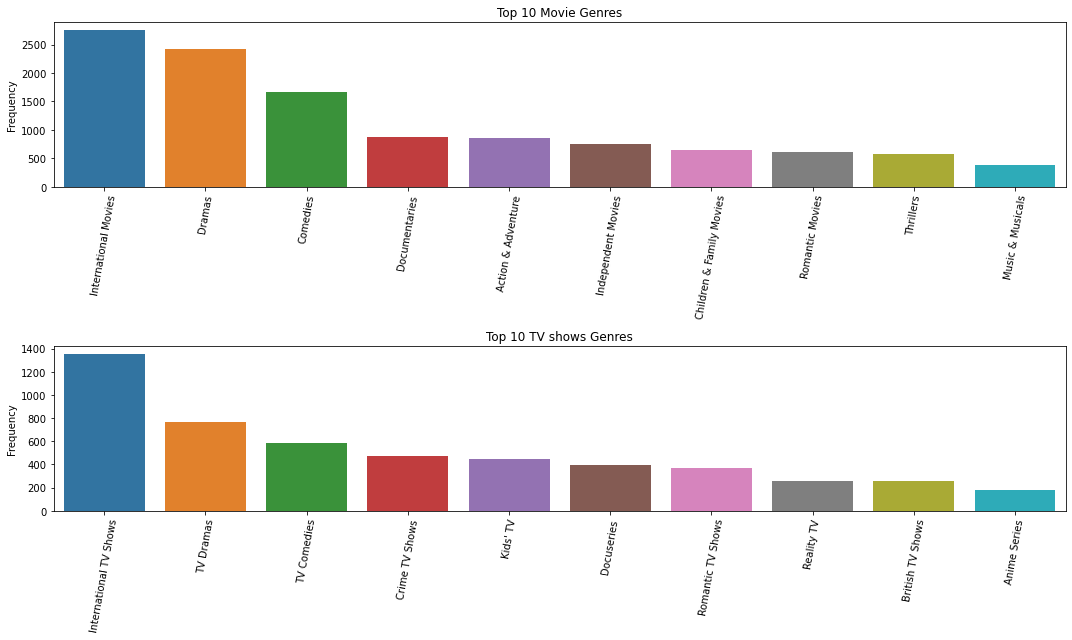

In [21]:
fig, ax = plt.subplots(2,1,figsize=(15,9))
sns.barplot(x=pd.Series(movie_genres).value_counts().head(10).index, y=pd.Series(movie_genres).value_counts().head(10).values, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=80)
ax[0].set_title('Top 10 Movie Genres')
ax[0].set_ylabel('Frequency')
sns.barplot(x=pd.Series(tv_genres).value_counts().head(10).index, y=pd.Series(tv_genres).value_counts().head(10).values, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=80)
ax[1].set_title('Top 10 TV shows Genres')
ax[1].set_ylabel('Frequency')
fig.tight_layout()
print()

Insight : 
- Drama and comedy are top Genres for both movies/tv shows

---

### Countries leading in content genre-wise: <a class='anchor' id='toc5.2'></a>

In [22]:
tmp = df[['country','listed_in']].astype(str)

In [23]:
show_genre_dict = {}
for _, row in tqdm(tmp.iterrows()): #iterate through all shows
    for genre in row['listed_in'].split(','): #iterate through all genres 
        if genre.strip() not in show_genre_dict.keys(): #if genre is not in dict create an empty list
            show_genre_dict[genre.strip()] = []
        for country in row['country'].split(','): #iterate through all countries
            if country.strip() != 'nan':
                show_genre_dict[genre.strip()].append(country.strip())

8807it [00:01, 7508.05it/s]


show_genre_dict : 
    - Keys are all the different genres (genres are extracted from listed_in column)
    - Values are the countries where the genre was produced (extracted from country column)
    - eg show_genre_dict['Dramas'] -> ['United States', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany']
    - The values can have duplicates. Finding the mode of the list we can get the country where this genre is most produced

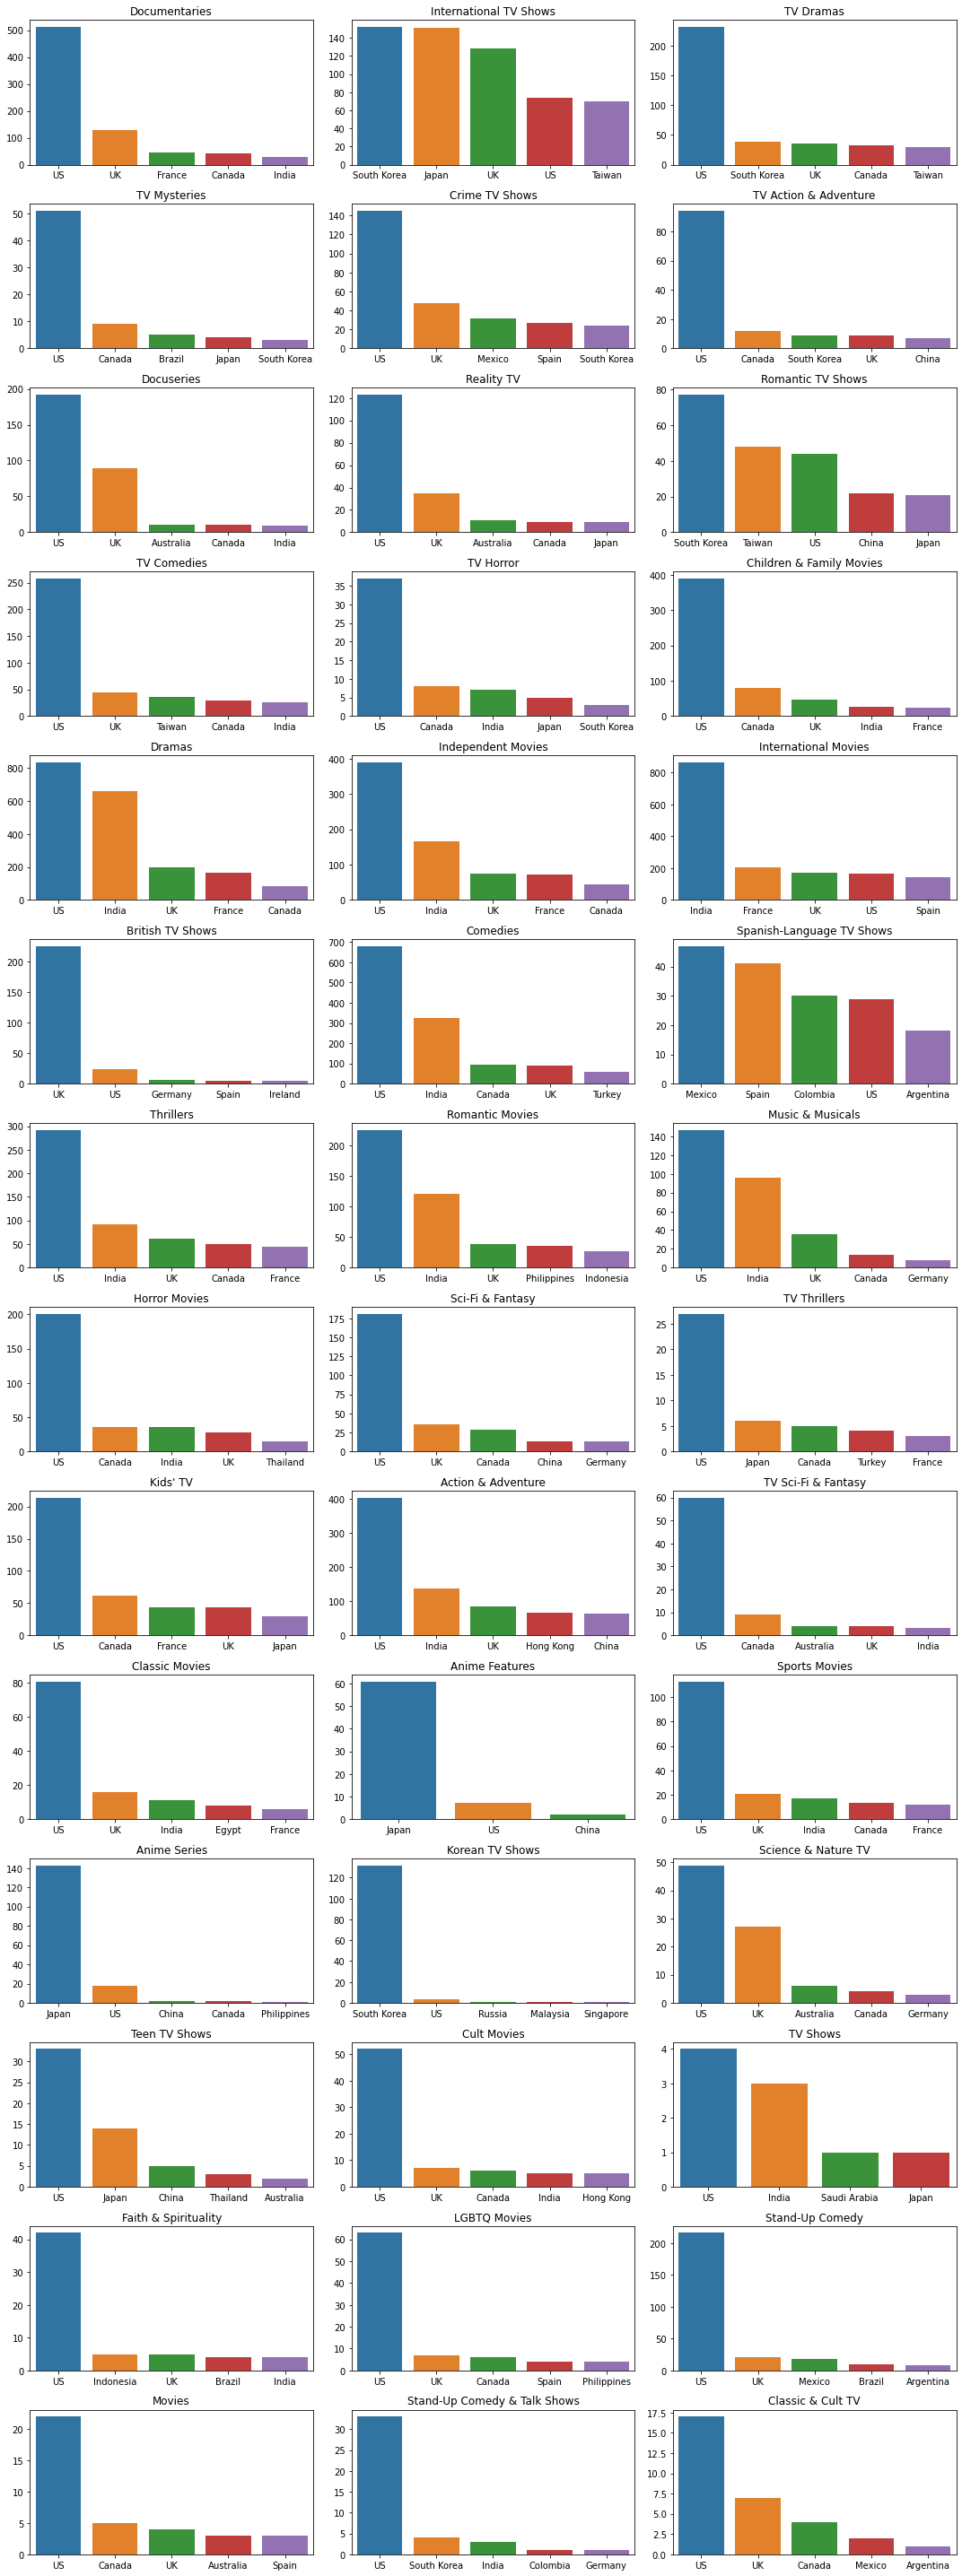

In [24]:
plt.rcParams['figure.figsize'] = 15,40
plt.rcParams['figure.autolayout'] = True
for i,key in enumerate(show_genre_dict.keys()):
    ax = plt.subplot(14,3,i+1)
    sns.barplot(pd.Series(show_genre_dict[key]).replace({'United States':'US','United Kingdom':'UK'}).value_counts().head().index,
               pd.Series(show_genre_dict[key]).replace({'United States':'US','United Kingdom':'UK'}).value_counts().head().values,
               ax=ax)
    ax.set_title(key)

Insight : 
- US is a clear leader across all genres except :
    - Japan in Anime Series, Anime Features
    - South Korea in Korean movies, International TV show, Romantic TV Shows
    - Mexico in spanish language tv shows 
    - India in international movies 
- US is #1 in 35/42 genres

- Although netflix should continue to invest in US across all genres we will look at what is the most promising country other than US/genre leader for each genre

### Recommendation for best upcoming country for each genre : <a class='anchor' id='toc5.3'></a>

In [25]:
show_genre_dict

{'Documentaries': ['United States',
  'France',
  'United States',
  'United States',
  'United Kingdom',
  'United States',
  'United States',
  'United States',
  'United Kingdom',
  'Belgium',
  'United Kingdom',
  'United States',
  'Brazil',
  'United Kingdom',
  'United States',
  'United States',
  'Egypt',
  'Denmark',
  'Germany',
  'United States',
  'United States',
  'France',
  'Germany',
  'United States',
  'United States',
  'United States',
  'United Kingdom',
  'United States',
  'Netherlands',
  'United States',
  'Argentina',
  'United Arab Emirates',
  'United States',
  'Australia',
  'United States',
  'United States',
  'United States',
  'United Kingdom',
  'United States',
  'United States',
  'Spain',
  'India',
  'United States',
  'India',
  'United States',
  'United States',
  'United States',
  'United States',
  'China',
  'United Kingdom',
  'Lebanon',
  'Palestine',
  'Denmark',
  'Qatar',
  'United States',
  'United Kingdom',
  'United States',
  'N

- show_genre_dict : Contains

upcoming_country_for_each_genre :
- is a dictonary
- keys are genres
- values is a list with 3 elements : [upcoming country, best director, best cast]

In [26]:
upcoming_country_for_each_genre = {}
for k,v in show_genre_dict.items():
    upcoming_country = pd.Series(show_genre_dict[k]).value_counts().index[1]
    upcoming_country_for_each_genre[k] = [upcoming_country]

In [27]:
for k,v in upcoming_country_for_each_genre.items():
    
    # Subset on country
    tmp = df[df['country'] == v[0]]
    # Subset on genre
    tmp = tmp[tmp['listed_in'].str.contains(k)]
    
    #best director
    dirs = flatten_list(tmp['director'])
    try:
        best_dir = max(set(dirs), key=dirs.count)
    except:
        best_dir = 'NA'
    
    #best cast
    cast = flatten_list(tmp['cast'])
    try:
        best_cast = max(set(cast), key=cast.count)
    except:
        best_cast = 'NA'
        
    upcoming_country_for_each_genre[k].extend([best_dir, best_cast])

 format -> genre : [country , best director, best cast]

In [28]:
upcoming_country_for_each_genre

{'Documentaries': ['United Kingdom', 'Edward Cotterill', 'Samuel West'],
 'International TV Shows': ['Japan', 'Hayato Date', 'Takahiro Sakurai'],
 'TV Dramas': ['South Korea', 'Lee Kyoungmi', 'Cho Seong-ha'],
 'TV Mysteries': ['Canada', 'NA', 'Jim Watson'],
 'Crime TV Shows': ['United Kingdom', 'Ellena Wood', 'Charlie Creed-Miles'],
 'TV Action & Adventure': ['Canada', 'NA', 'Brianna Daguanno'],
 'Docuseries': ['United Kingdom', 'Alastair Fothergill', 'David Attenborough'],
 'Reality TV': ['United Kingdom', 'Andy Devonshire', 'Nadiya Hussain'],
 'Romantic TV Shows': ['Taiwan', 'Chang Chin-jung', 'Amanda Chou'],
 'TV Comedies': ['United Kingdom', 'Gordon Anderson', 'Ruth Bratt'],
 'TV Horror': ['Canada', 'NA', 'Greyston Holt'],
 'Children & Family Movies': ['Canada', 'Vivieno Caldinelli', 'Michela Luci'],
 'Dramas': ['India', 'Anurag Kashyap', 'Shah Rukh Khan'],
 'Independent Movies': ['India', 'Qaushiq Mukherjee', 'Naseeruddin Shah'],
 'International Movies': ['France', 'Thierry Donard